## # Task 3 :TO EXPLORE UNSUPERVISED MACHINE LEARNING

### Unsupervised learning is a class of machine learning (ML) techniques used to find patterns in data. The data given to unsupervised algorithms is not labelled, which means only the input variables(Features) are given with no corresponding output variables(Target).

### K-means clustering is one of the simplest unsupervised machine learning algorithms
* **We will apply k_means algorithm on IRIS Dataset**
* **In This we will compute optimal number of cluster**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset using pandas
iris = pd.read_csv("iris.csv")

#### **Exploring The Data**

In [3]:
iris.shape

(150, 6)

In [4]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
iris['Species'].value_counts() #This datases contains 3 classes of 50 instances each

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#Dropping 1st column
iris1=iris.drop('Id',axis=1)

In [10]:
iris1.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Checking the Missing Values

In [11]:
iris1.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### *Hence no missing Values*

## Preview of Data
 * **There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).**
 * **There are no null values, so we don't have to worry about that.**
 * **There are 50 observations of each species (setosa, versicolor, virginica).**
 * **Balanced Class Distribution.**

## Analysing the Data Visually

#### Ploting the Features through Histogram

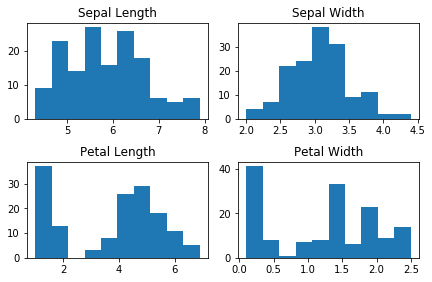

In [12]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(iris1['SepalLengthCm'], bins = n_bins)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(iris1['SepalWidthCm'], bins = n_bins)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(iris1['PetalLengthCm'], bins = n_bins)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(iris1['PetalWidthCm'], bins = n_bins)
axs[1,1].set_title('Petal Width')
fig.tight_layout(pad=1.0)

**Scatterplots of all-paired attributes**

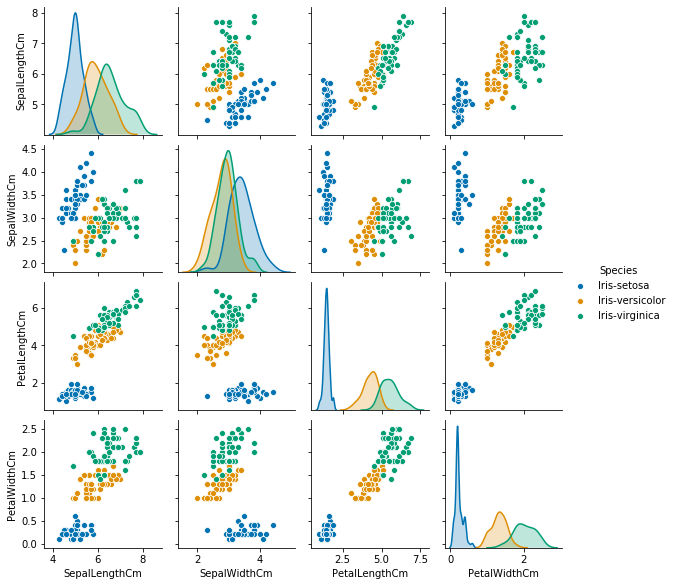

In [13]:
sns.pairplot(iris1, hue="Species", height = 2, palette = 'colorblind') #import seaborn as sns

**From the above ScatterPlot,we note That Petal Length and Petal Width are highly correlated.So we can consider these 2 features while implementing our model to predict Species.**

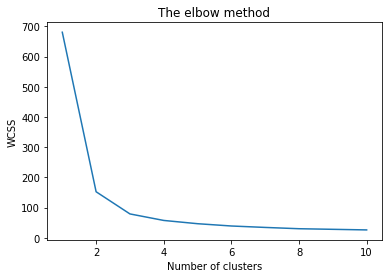

In [14]:
# Using the ELBOW method to calculate optimal number of cluster
X = iris1.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []                   # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### From The Elbow Method we get k=3 Clusters as after 3 the value of wcss doesn't decreases substantially

### **Applying k-means to the Iris Dattaset**

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

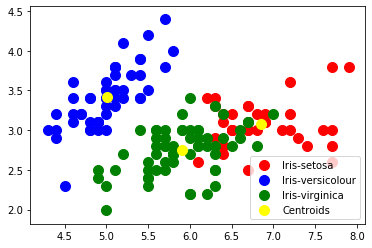

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()